In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Import  The Data

In [82]:
df = pd.read_csv(r'E:\Practice\1. Weather Data.csv')

In [83]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## EDA

In [15]:
df.shape

(8784, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [8]:
df.duplicated().sum()

0

C:\Users\BMT\AppData\Local\Temp\ipykernel_8188\3869148957.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot: >

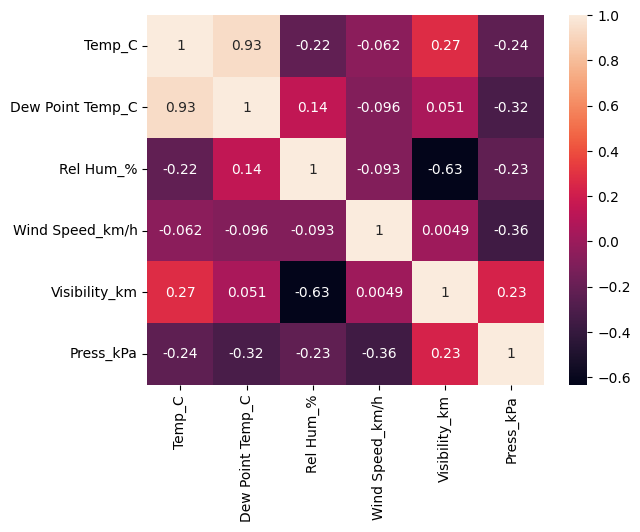

In [40]:
## Correlation 

correlation = df.corr()

sns.heatmap(correlation, annot = True)

In [61]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

## Explain Each Column

In [32]:
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [33]:
df['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

In [31]:
df['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [41]:
## When The Weather is Mainly Clear

df[df['Weather'] == 'Clear']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [44]:
## When wind speed is 4 
wind_speed4 = df['Wind Speed_km/h'] == 4 
df.loc[wind_speed4]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,1/5/2012 0:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,1/5/2012 5:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,1/7/2012 2:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,12/31/2012 8:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,12/31/2012 9:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,12/31/2012 10:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow


In [59]:
## When wind speed is  22  and the weather is Rain,Snow

wind_speed4 = df['Wind Speed_km/h'] == 22 
w_Snow_Showers = df['Weather'] == 'Snow Showers'

df.loc[wind_speed4 & w_Snow_Showers ]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
50,1/3/2012 2:00,-10.5,-15.8,65,22,12.9,100.53,Snow Showers
53,1/3/2012 5:00,-12.9,-19.1,60,22,25.0,100.76,Snow Showers
570,1/24/2012 18:00,1.5,-2.9,72,22,25.0,100.95,Snow Showers
649,1/28/2012 1:00,-0.2,-2.9,82,22,25.0,100.34,Snow Showers
7891,11/24/2012 19:00,-0.9,-5.0,74,22,19.3,99.90,Snow Showers
7987,11/28/2012 19:00,1.0,-0.7,88,22,12.9,101.35,Snow Showers


In [88]:
## Change columns name

df.rename(columns={'Weather' : 'Weather Condition'}, inplace=True)

In [89]:
df.head(3)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


In [90]:
## Visability

df['Visibility_km'].describe()

count    8784.000000
mean       27.664447
std        12.622688
min         0.200000
25%        24.100000
50%        25.000000
75%        25.000000
max        48.300000
Name: Visibility_km, dtype: float64

In [91]:
## Press_kPa

df['Press_kPa'].std()

0.8440047459486474

In [92]:
## Relative Humidaty

df['Rel Hum_%'].var()

286.2485501984998

In [93]:
## When Weather is snow 

df[df['Weather Condition'] == 'Snow']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,1/4/2012 15:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,1/4/2012 16:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [95]:
## When Weather contain snow

df[df['Weather Condition'].str.contains('Snow')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [ ]:
## Wind Speed is above 24' and 'Visibility is 25

wind_Speed = df['Wind Speed_km/h'] > 24 
visability = df['Visibility_km'] == 25 

df.loc[wind_Speed & visability]

In [98]:
## Group by Weather Condition

df.groupby('Weather Condition').mean()

C:\Users\BMT\AppData\Local\Temp\ipykernel_8188\372090256.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Weather Condition').mean()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


In [100]:
df.groupby('Weather Condition').agg(['min', 'max'])

Date/Time                    \
                                                      min               max   
Weather Condition                                                             
Clear                                      1/11/2012 1:00     9/9/2012 5:00   
Cloudy                                     1/1/2012 17:00    9/9/2012 23:00   
Drizzle                                   1/23/2012 21:00    9/30/2012 3:00   
Drizzle,Fog                               1/23/2012 20:00    9/30/2012 2:00   
Drizzle,Ice Pellets,Fog                   12/17/2012 9:00   12/17/2012 9:00   
Drizzle,Snow                             12/17/2012 15:00  12/19/2012 18:00   
Drizzle,Snow,Fog                         12/18/2012 21:00   12/22/2012 3:00   
Fog                                         1/1/2012 0:00    9/22/2012 0:00   
Freezing Drizzle                          1/13/2012 10:00     2/1/2012 5:00   
Freezing Drizzle,Fog                        1/1/2012 2:00   12/10/2012 5:00   
Freezing Drizzle,Haze                      2/1/2012 11:00    2/1/2012 13:00   
Freezing Drizzle,Snow                      1/13/2012 3:00    3/2/2012 12:00   
Freezing Fog                               1/22/2012 6:00    3/17/2012 6:00   
Freezing Rain                             1/13/2012 11:00     2/1/2012 7:00   
Freezing Rain,Fog                         1/17/2012 23:00   12/17/2012 1:00   
Freezing Rain,Haze                         2/1/2012 14:00    2/1/2012 15:00   
Freezing Rain,Ice Pellets,Fog             12/17/2012 3:00   12/17/2012 3:00   
Freezing Rain,Snow Grains                  1/13/2012 9:00    1/13/2012 9:00   
Haze                                      1/22/2012 12:00   3/13/2012 23:00   
Mainly Clear                              1/10/2012 11:00     9/9/2012 9:00   
Moderate Rain,Fog                         12/10/2012 8:00   12/10/2012 8:00   
Moderate Snow                             1/12/2012 15:00   12/27/2012 9:00   
Moderate Snow,Blowing Snow               12/27/2012 10:00  12/27/2012 12:00   
Mostly Cloudy                              1/1/2012 16:00     9/9/2012 2:00   
Rain                                       1/1/2012 18:00     9/5/2012 2:00   
Rain Showers                               1/1/2012 22:00    9/8/2012 16:00   
Rain Showers,Fog                          10/20/2012 3:00   10/20/2012 3:00   
Rain Showers,Snow Showers                  11/4/2012 8:00   12/5/2012 10:00   
Rain,Fog                                  1/23/2012 18:00   9/30/2012 23:00   
Rain,Haze                                  3/13/2012 7:00    3/13/2012 9:00   
Rain,Ice Pellets                          12/18/2012 5:00   12/18/2012 5:00   
Rain,Snow                                  1/10/2012 5:00    4/23/2012 3:00   
Rain,Snow Grains                          12/21/2012 0:00   12/21/2012 0:00   
Rain,Snow,Fog                             12/8/2012 21:00   12/8/2012 21:00   
Rain,Snow,Ice Pellets                     12/21/2012 1:00   12/21/2012 5:00   
Snow                                       1/10/2012 1:00    4/27/2012 9:00   
Snow Pellets                             11/24/2012 15:00  11/24/2012 15:00   
Snow Showers                               1/12/2012 7:00    3/4/2012 21:00   
Snow Showers,Fog                          12/26/2012 9:00  12/29/2012 13:00   
Snow,Blowing Snow                         1/13/2012 21:00    2/25/2012 9:00   
Snow,Fog                                 12/16/2012 15:00   3/14/2012 19:00   
Snow,Haze                                  2/1/2012 17:00    2/1/2012 21:00   
Snow,Ice Pellets                          12/10/2012 3:00     3/3/2012 4:00   
Thunderstorms                              7/16/2012 1:00    7/4/2012 16:00   
Thunderstorms,Heavy Rain Showers           5/29/2012 6:00    5/29/2012 6:00   
Thunderstorms,Moderate Rain Showers,Fog    7/17/2012 6:00    7/17/2012 6:00   
Thunderstorms,Rain                        5/25/2012 20:00   7/23/2012 18:00   
Thunderstorms,Rain Showers                5/29/2012 16:00     9/8/2012 4:00   
Thunderstorms,Rain 

In [101]:
## Weather Condition is Fog

df[df['Weather Condition'].str.contains('Fog')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8739,12/30/2012 3:00,-9.1,-10.4,90,11,3.6,100.30,"Snow,Fog"
8740,12/30/2012 4:00,-9.3,-10.6,90,13,9.7,100.28,"Snow,Fog"
8741,12/30/2012 5:00,-9.1,-10.4,90,11,4.0,100.32,"Snow,Fog"
8742,12/30/2012 6:00,-9.3,-10.8,89,17,8.0,100.39,"Snow,Fog"


In [106]:
## Weather is Clear' or 'Visibility is above 40

df[(df['Weather Condition'] == ('Clear')) | (df['Visibility_km'] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


In [108]:
## 'Weather is Clear' and 'Relative Humidity is greater than 50' OR  Visibility is above 40

df[(df['Weather Condition'] == ('Clear')) & (df['Rel Hum_%'] > 50) | (df['Visibility_km'] > 40)]


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,1/5/2012 14:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear
